<a href="https://colab.research.google.com/github/sukritimahajan35/Parkinson-Detection-Using-Machine-Learning-and-Deep-Learning-/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io

In [ ]:
#Loading the Data set
Dataset_pk = pd.read_csv('/content/telemonitoring_parkinsons_updrs.data.csv')

In [ ]:
#Analysing Data
print(Dataset_pk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
Dataset_pk_target = Dataset_pk.iloc[:,5]
Dataset_pk=Dataset_pk.drop(['age', 'subject#', 'sex'] , axis=1)
Dataset_pk= Dataset_pk.drop(['total_UPDRS'], axis=1)
# Provide 'Address' as the column name
Dataset_pk['total_UPDRS'] = Dataset_pk_target
print(Dataset_pk.info)

<bound method DataFrame.info of       test_time  motor_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0        5.6431       28.199    0.00662     0.000034     0.00401      0.00317   
1       12.6660       28.447    0.00300     0.000017     0.00132      0.00150   
2       19.6810       28.695    0.00481     0.000025     0.00205      0.00208   
3       25.6470       28.905    0.00528     0.000027     0.00191      0.00264   
4       33.6420       29.187    0.00335     0.000020     0.00093      0.00130   
...         ...          ...        ...          ...         ...          ...   
5870   142.7900       22.485    0.00406     0.000031     0.00167      0.00168   
5871   149.8400       21.988    0.00297     0.000025     0.00119      0.00147   
5872   156.8200       21.495    0.00349     0.000025     0.00152      0.00187   
5873   163.7300       21.007    0.00281     0.000020     0.00128      0.00151   
5874   170.7300       20.513    0.00282     0.000021     0.00135      0.00166

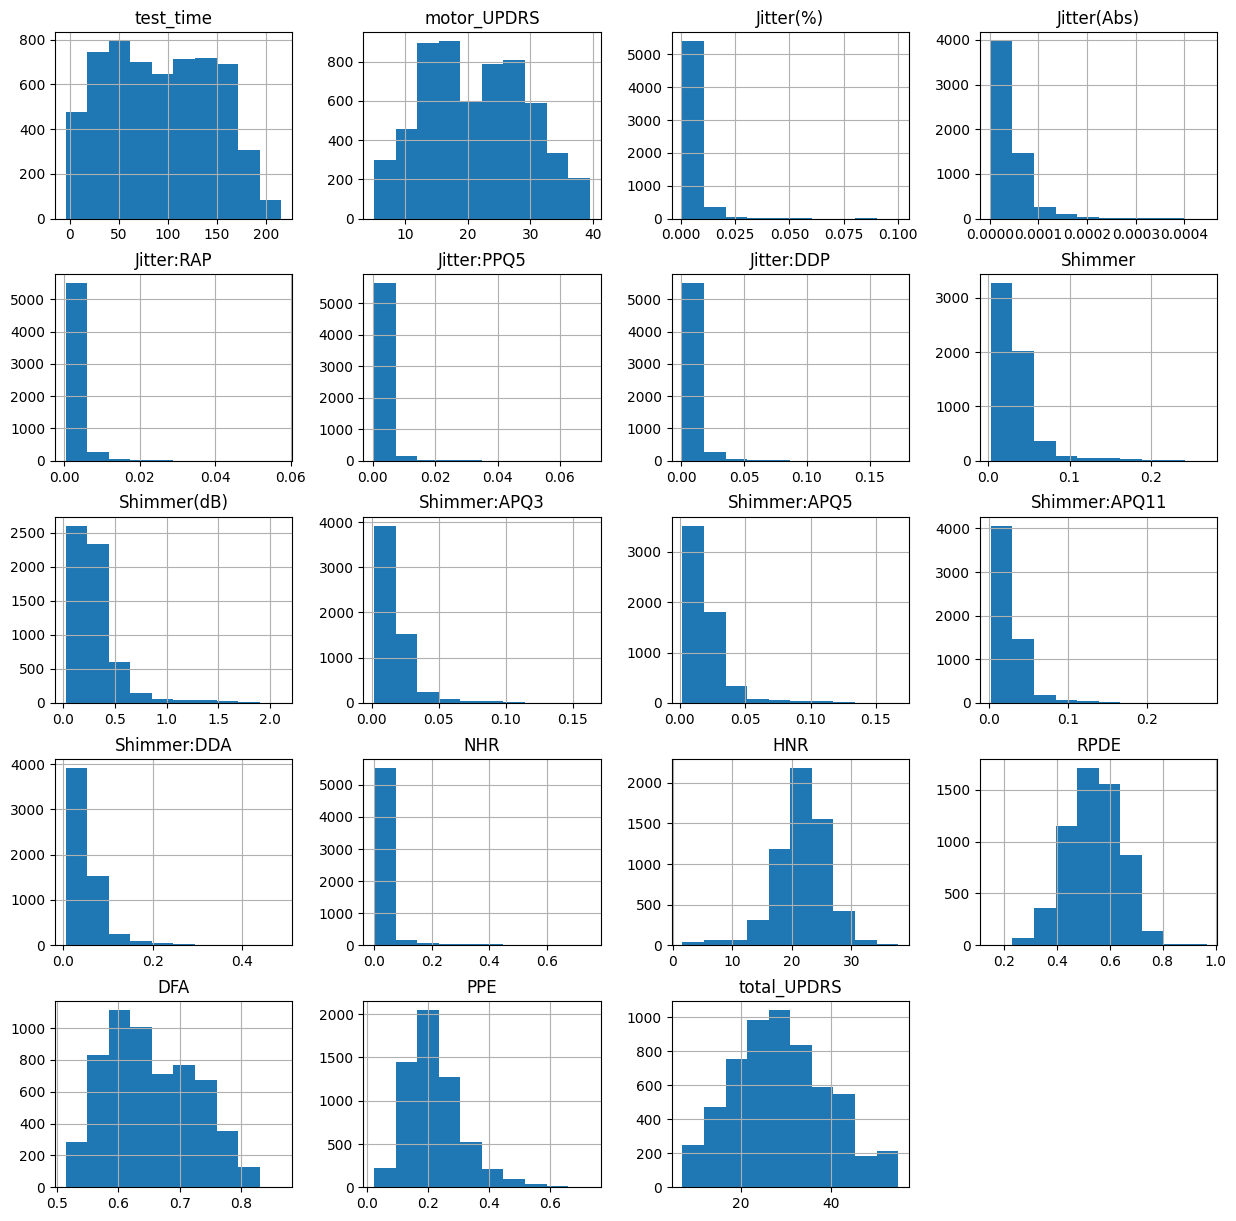

In [ ]:
#Inspecting Distribution of Features
Dataset_pk.hist( figsize=(15, 15))
plt.show()

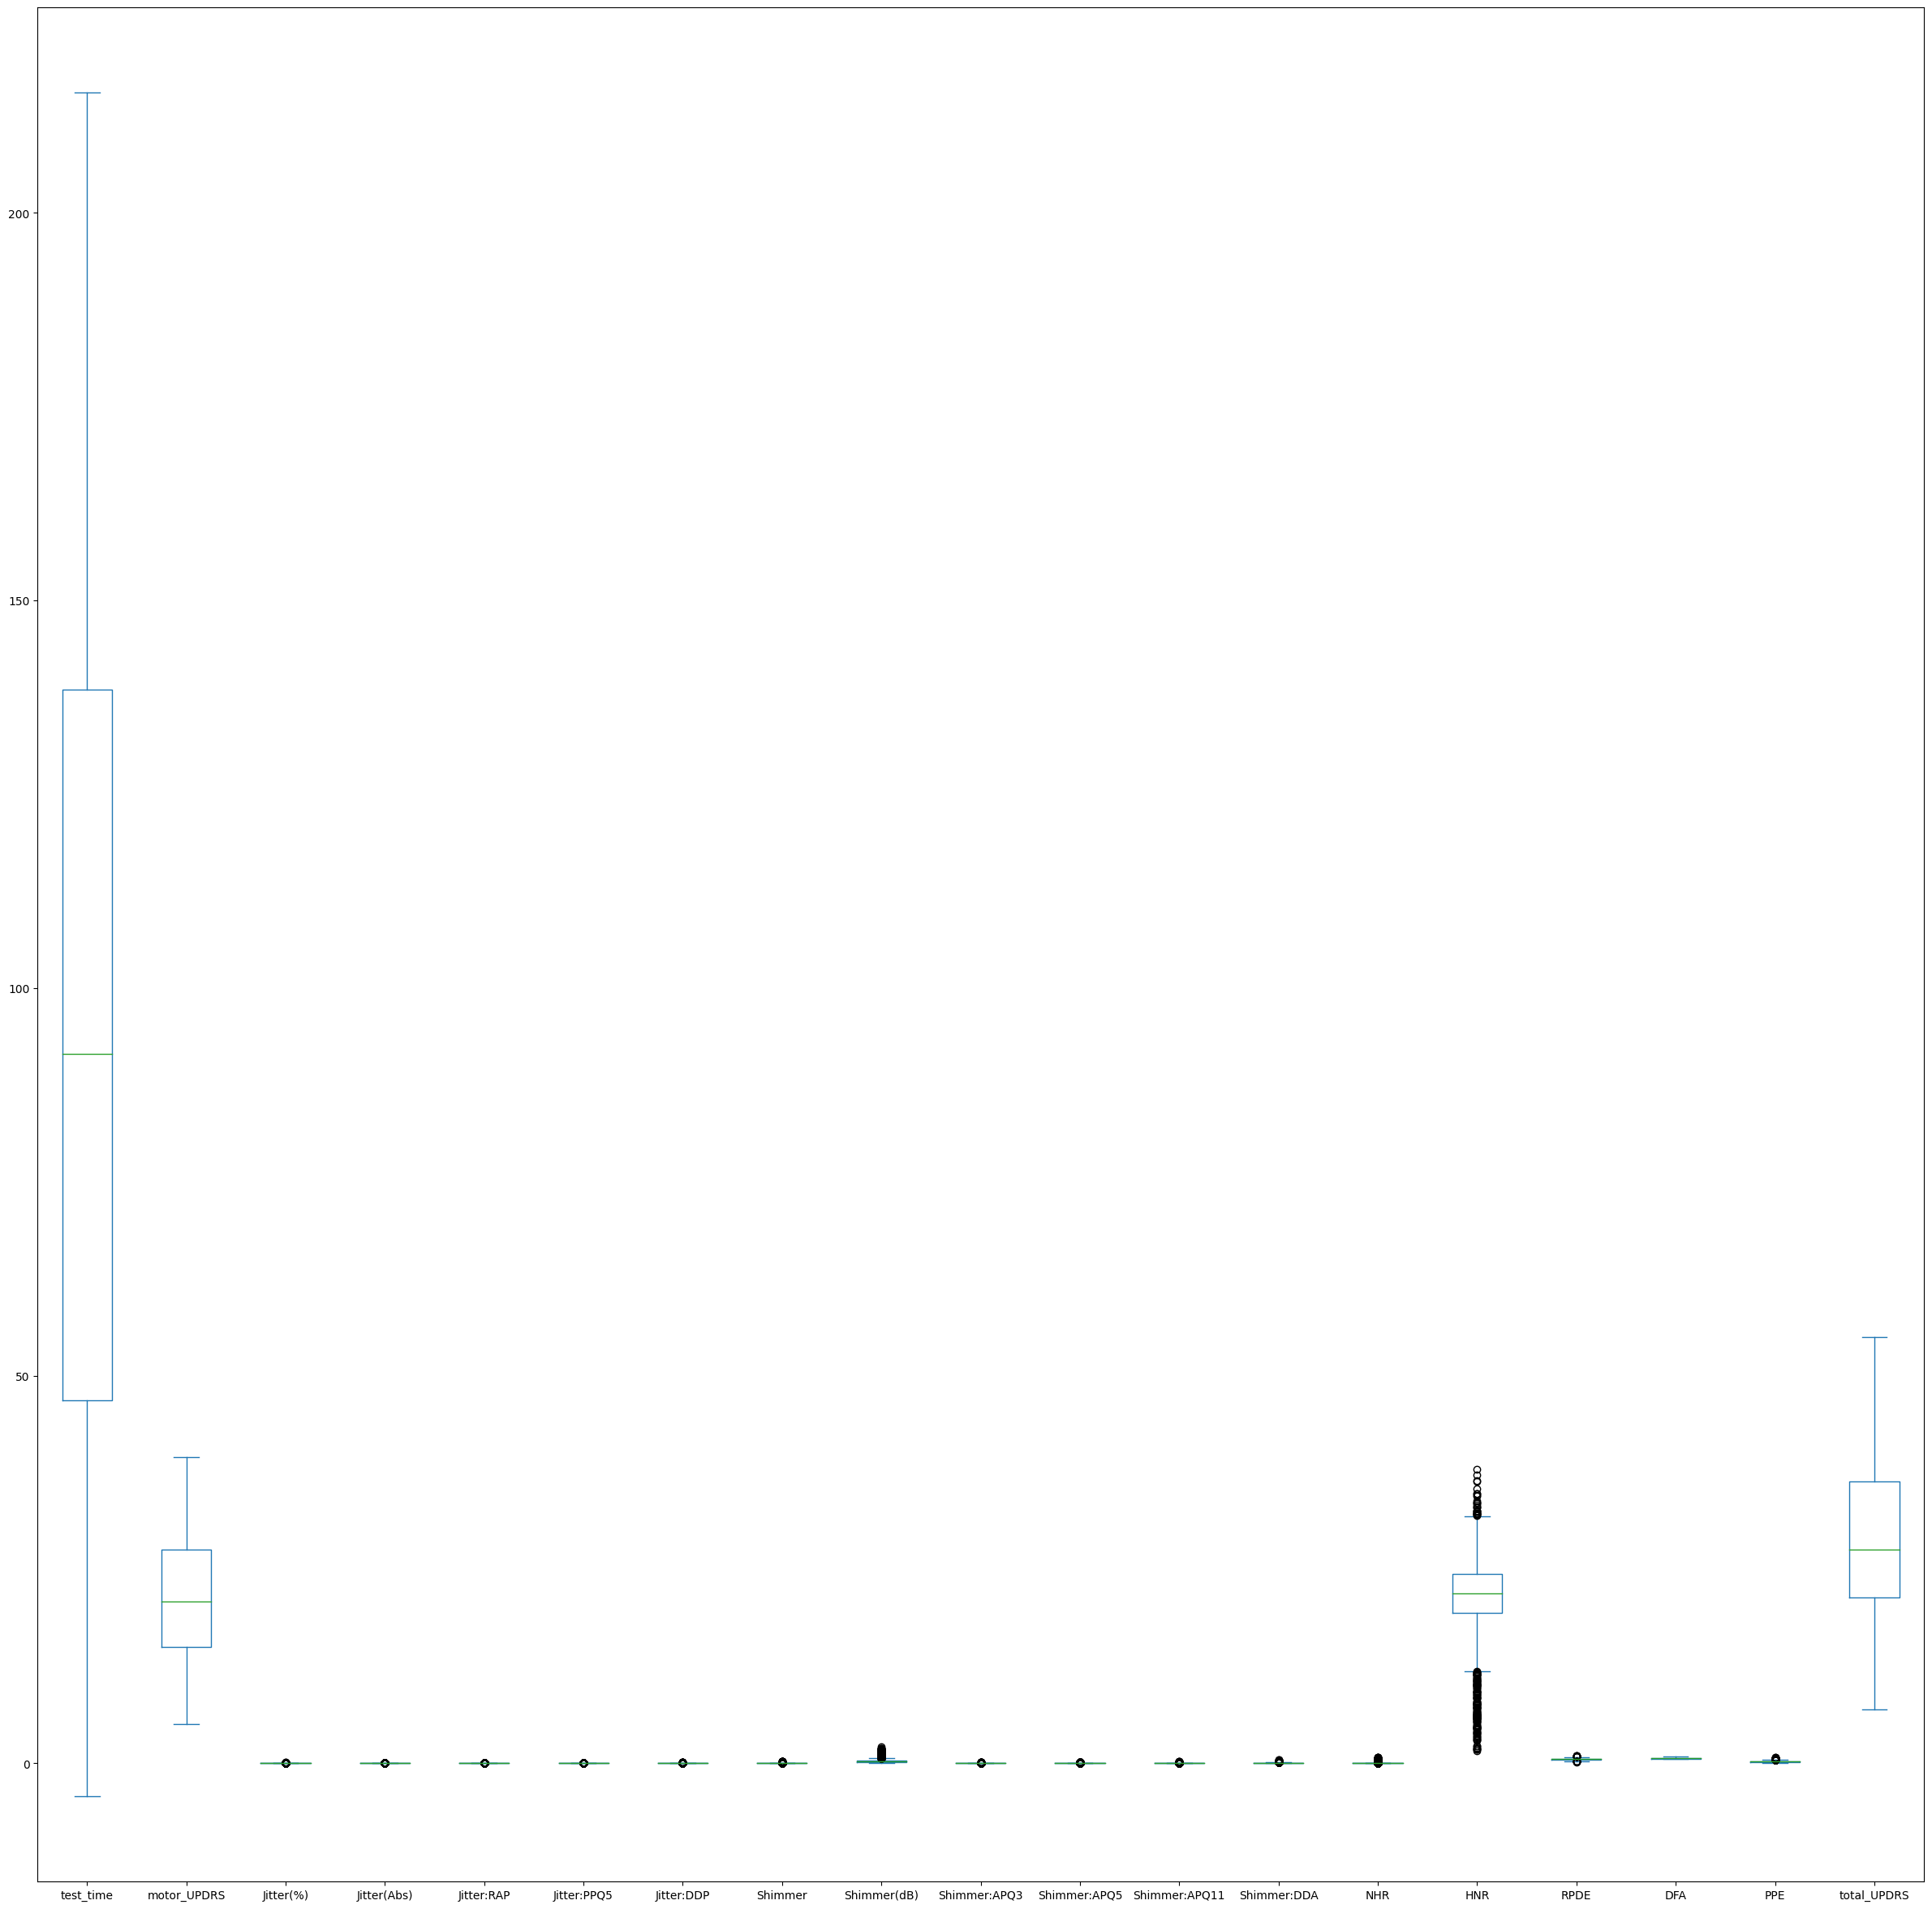

In [ ]:
#Inspecting Features using Boxplot
Dataset_pk.plot(kind='box',figsize=(30,30) )
plt.show()

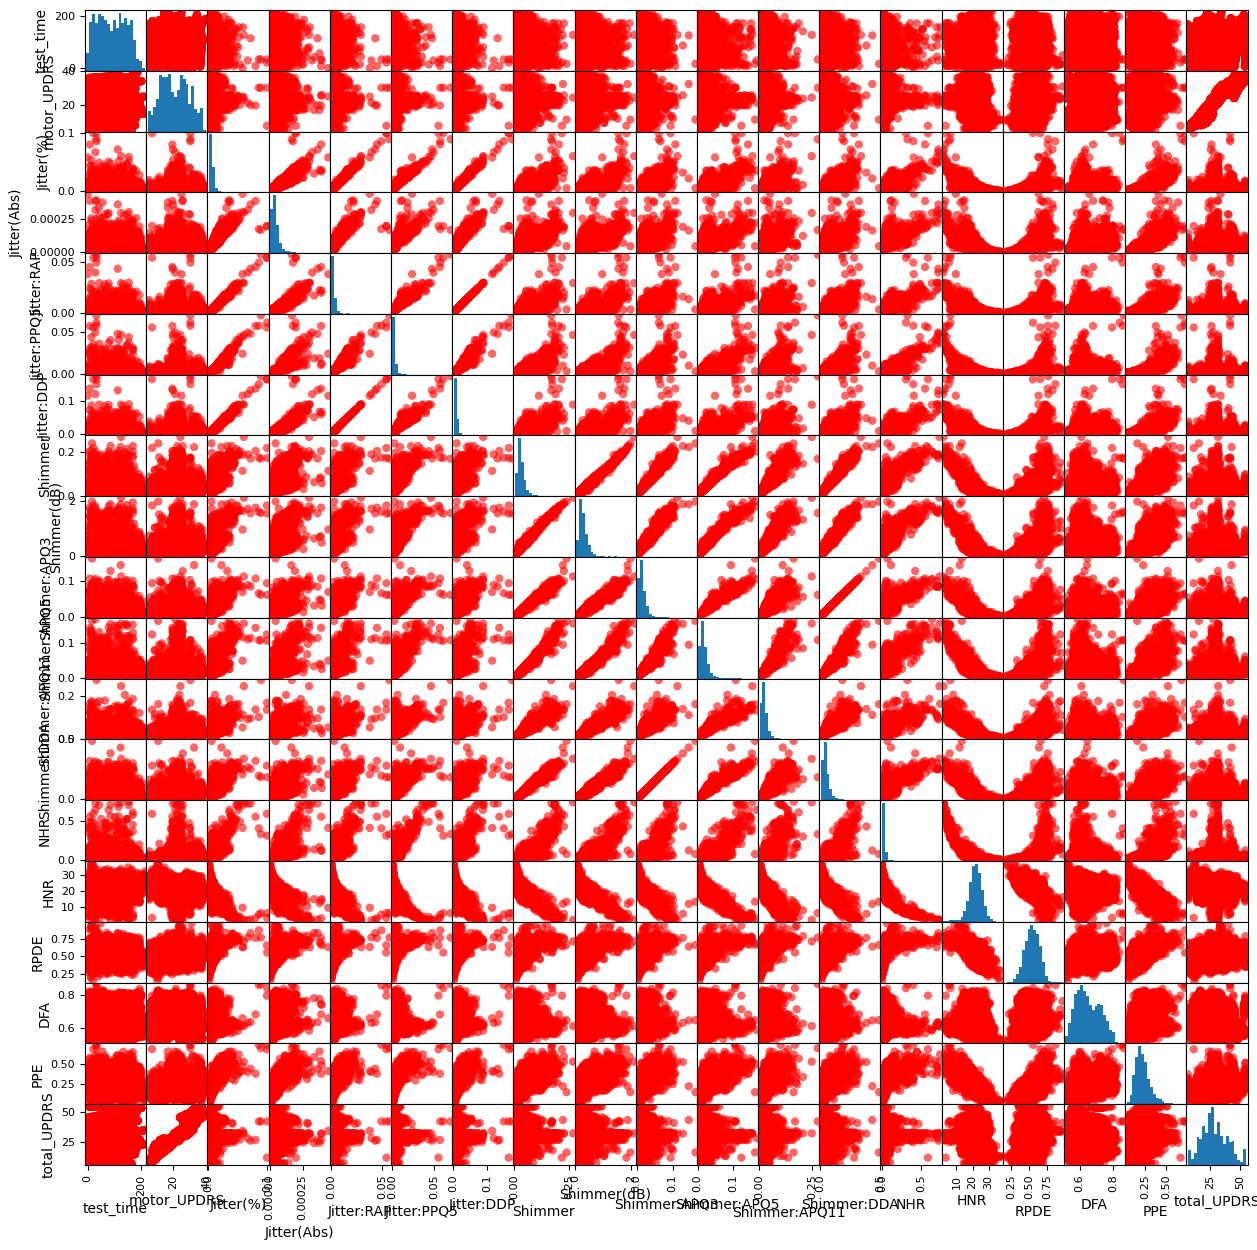

In [ ]:
#Visualizing Interactions between features
grr=pd.plotting.scatter_matrix(Dataset_pk, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, alpha=.6, color='red')

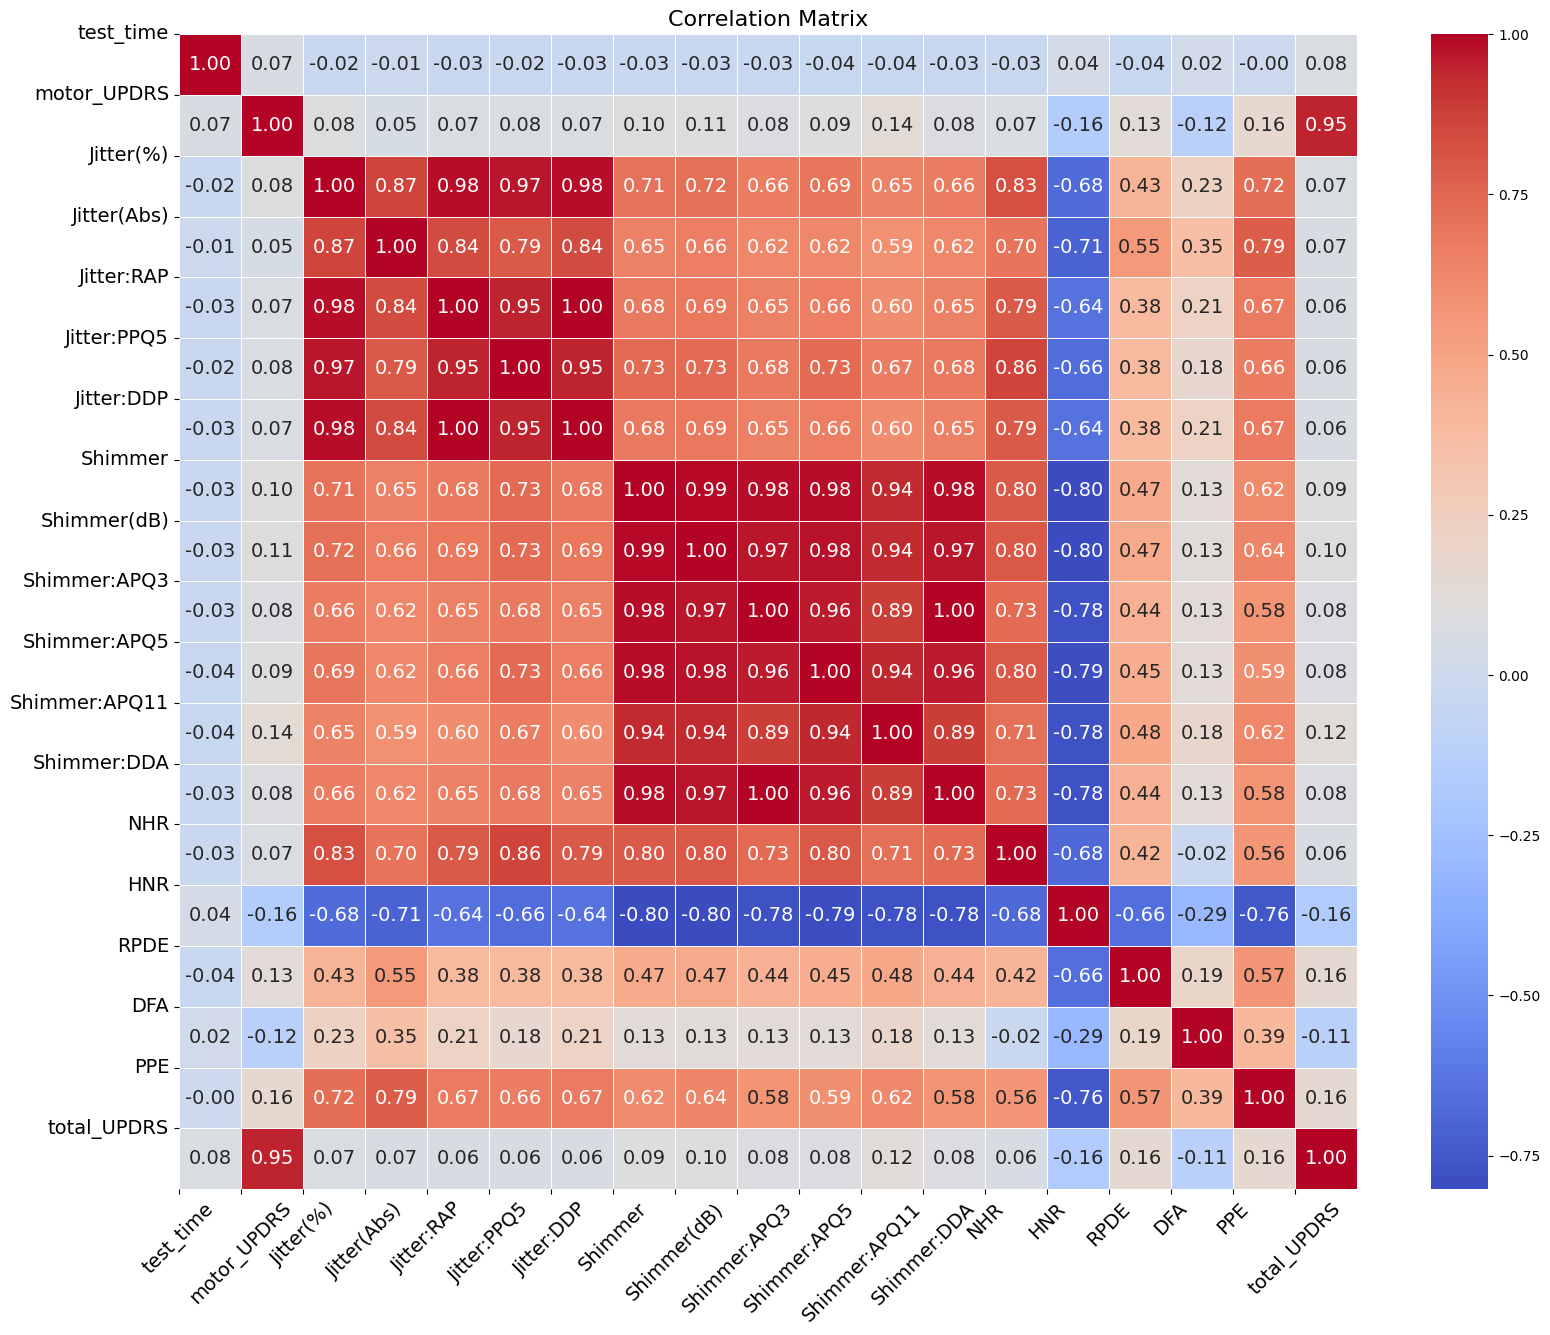

In [ ]:
#Visualizing correlation strength
import seaborn as sns
corr = Dataset_pk.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 14})
plt.xticks(range(Dataset_pk.shape[1]), Dataset_pk.columns, fontsize=14, rotation=45)
plt.yticks(range(Dataset_pk.shape[1]), Dataset_pk.columns, fontsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
#Design Hold-Out enviornment
#My_data contains all data points from My_data set from from third feature to 19th feature(indicator features)
My_data = Dataset_pk.iloc[:,0:18]

#My_target contains class information which is 19th feature in the data set of
My_data_target=Dataset_pk.iloc[:,18]
print(My_data_target.shape)

(5875,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(My_data, My_data_target, test_size=0.8, random_state=10)

In [ ]:
#Importing linear and non linear regression models
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

#Importing sklearn Pipeline to automate the ML processes
from sklearn.pipeline import Pipeline

#Importing sklearn preprocessing methods
from sklearn.preprocessing import StandardScaler

In [ ]:
#Automating standardization and Regression suit using Sklearn Pipeline
#Making pipeline of standardization and various regression models

Pipeline_Models = []
Pipeline_Models.append(('scaledLR', Pipeline([('Scaler', StandardScaler()),
                                             ('LRmodel', linear_model.LinearRegression()
                                             )])))
Pipeline_Models.append(('scaledLasso', Pipeline([('Scaler', StandardScaler()),
                                             ('Lassomodel', linear_model.Lasso()
                                             )])))

Pipeline_Models.append(('scaledRidge', Pipeline([('Scaler', StandardScaler()),
                                             ('Ridgemodel', linear_model.Ridge()
                                             )])))


Pipeline_Models.append(('scaledSVR', Pipeline([('Scaler', StandardScaler()),
                                             ('SVRmodel', SVR()
                                             )])))


Pipeline_Models.append(('scaledCART', Pipeline([('Scaler', StandardScaler()),
                                             ('CARTmodel', DecisionTreeRegressor()
                                             )])))


Pipeline_Models.append(('scaledKNN', Pipeline([('Scaler', StandardScaler()),
                                             ('KNNmodel', KNeighborsRegressor()
                                             )])))

In [ ]:
#Evaluating the Best performer
#Loading cross validation libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Creating empty lists to store results of cross validation and the name of the model
Model_Eval_Score =[]
Name_of_model =[]
#Applying cross validation on each algorithm in suit
for name, model_detail in Pipeline_Models:
    #Intiating cross validation with 10 iterations
    kfold = KFold(n_splits=10)
     #Applying cross validation with 10 iterations on the training data
    CV_Results = cross_val_score(model_detail, X_train, Y_train, cv=kfold,scoring='neg_mean_squared_error')
    #Adding result of each iteration in list
    Model_Eval_Score.append(CV_Results)
    #Name of the corresponding algorithm is stored as follows
    Name_of_model.append(name)

#Creating DataFrame with cross validation results where each row indicates the performance of the model on different cross validation iterations
CV_IterationsBy_model = pd.DataFrame(Model_Eval_Score,index=['LR','Lasso', 'Ridge',
                                 'SVR', 'CART', 'KNN'])
print("The 10 cross validation results of each regressor algoritm are: \n")
#Printing the transpose of the data frame so that each column is a unique model
Table_Results_CV= pd.DataFrame(CV_IterationsBy_model.T)
print(Table_Results_CV)
print("\n")
#Printing the mean of R2 square of each model
print("The mean performance of each regressor algorithm are: \n")
print(Table_Results_CV.mean())
print("\n")
print("The standard deviation of each regressor algorithm are: \n")
print(Table_Results_CV.std())

The 10 cross validation results of each regressor algoritm are: 

          LR      Lasso      Ridge        SVR       CART        KNN
0 -14.056344 -14.805505 -13.887018 -18.292233 -11.611967 -11.825803
1 -10.251254 -11.369818 -10.208897 -13.500490  -9.874616 -14.909099
2 -12.130726 -13.597621 -12.202333 -16.039134  -7.879608 -13.424328
3 -17.715026 -16.790068 -17.437916 -21.866914  -9.634782 -14.412782
4 -13.657759 -15.704785 -13.688048 -19.978212  -9.280145 -14.516528
5 -10.829915 -11.813173 -10.907676 -16.927711 -11.149569 -12.292517
6 -14.478588 -16.704248 -14.482165 -18.526669 -14.162580 -11.380969
7  -9.404350  -9.457956  -9.276009 -10.871697  -9.419761 -11.186925
8 -13.750885 -13.654935 -13.457756 -18.348744 -11.993013 -16.201272
9 -11.241109 -12.559514 -11.279231 -15.305355  -7.728083 -11.844432


The mean performance of each regressor algorithm are: 

LR      -12.751595
Lasso   -13.645762
Ridge   -12.682705
SVR     -16.965716
CART    -10.273412
KNN     -13.199466
dtype: float64

In [ ]:
#Hyperparameter Optimization of Decision tree
#Loading GridSearchCV() for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
#Said model as this model was discovered by cross validation which used standardized training data.
#Create object of StandardScaler()
#My_target contains class information which is 19th feature in the data set

#Silencing warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=DeprecationWarning)

Standardisation = StandardScaler()
Standardisation.fit(X_train)
Scaleddata_trainX= Standardisation.transform(X_train)
Y_test_reshaped = np.repeat(Y_test.values.reshape(-1, 1), 18, axis=1)
Scaleddata_trainY = Standardisation.transform(Y_test_reshaped)

#Setting paramters
param_grid_DTR = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

#Creating instance of SVR model
Model_DTR = DecisionTreeRegressor()
#Using GridSearchCV to pass the model,values to parameters for tuning and cross validation folds
Grid_DTR = GridSearchCV(estimator =Model_DTR, param_grid=param_grid_DTR , cv=5)
#Fitting the model on the training set
Grid_DTR.fit(Scaleddata_trainX,Y_train )
#Printing the best parameters from the given list for the data set in consideration
Grid_DTR.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [ ]:
#Fitting the tuned parameter on the scaled training data set
Model_DTR = DecisionTreeRegressor(max_depth= 8,
 max_leaf_nodes= 100,
 min_samples_leaf = 20,
 min_samples_split=  10)

Model_DTR.fit(Scaleddata_trainX,Y_train)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=20,
                      min_samples_split=10)

In [ ]:
#Evaluating Performance of CART on Test data
Scaleddata_test= Standardisation.transform(X_test)

In [ ]:
#Getting prediction on train and test sets
DTR_pred_test= Model_DTR.predict(Scaleddata_test)

In [ ]:
print("Mean absolute Error:", metrics.mean_absolute_error(Y_test, DTR_pred_test))
print("Mean squared Error:", metrics.mean_squared_error(Y_test, DTR_pred_test))
print("R2 score:", round(metrics.r2_score(Y_test,DTR_pred_test),3))

Mean absolute Error: 2.206622495979164
Mean squared Error: 8.798584987090397
R2 score: 0.923


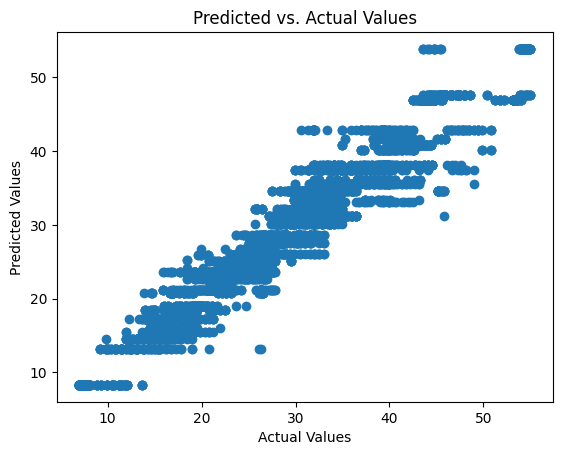

In [ ]:
#Plotting predicted VS actual
plt.scatter(Y_test, DTR_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

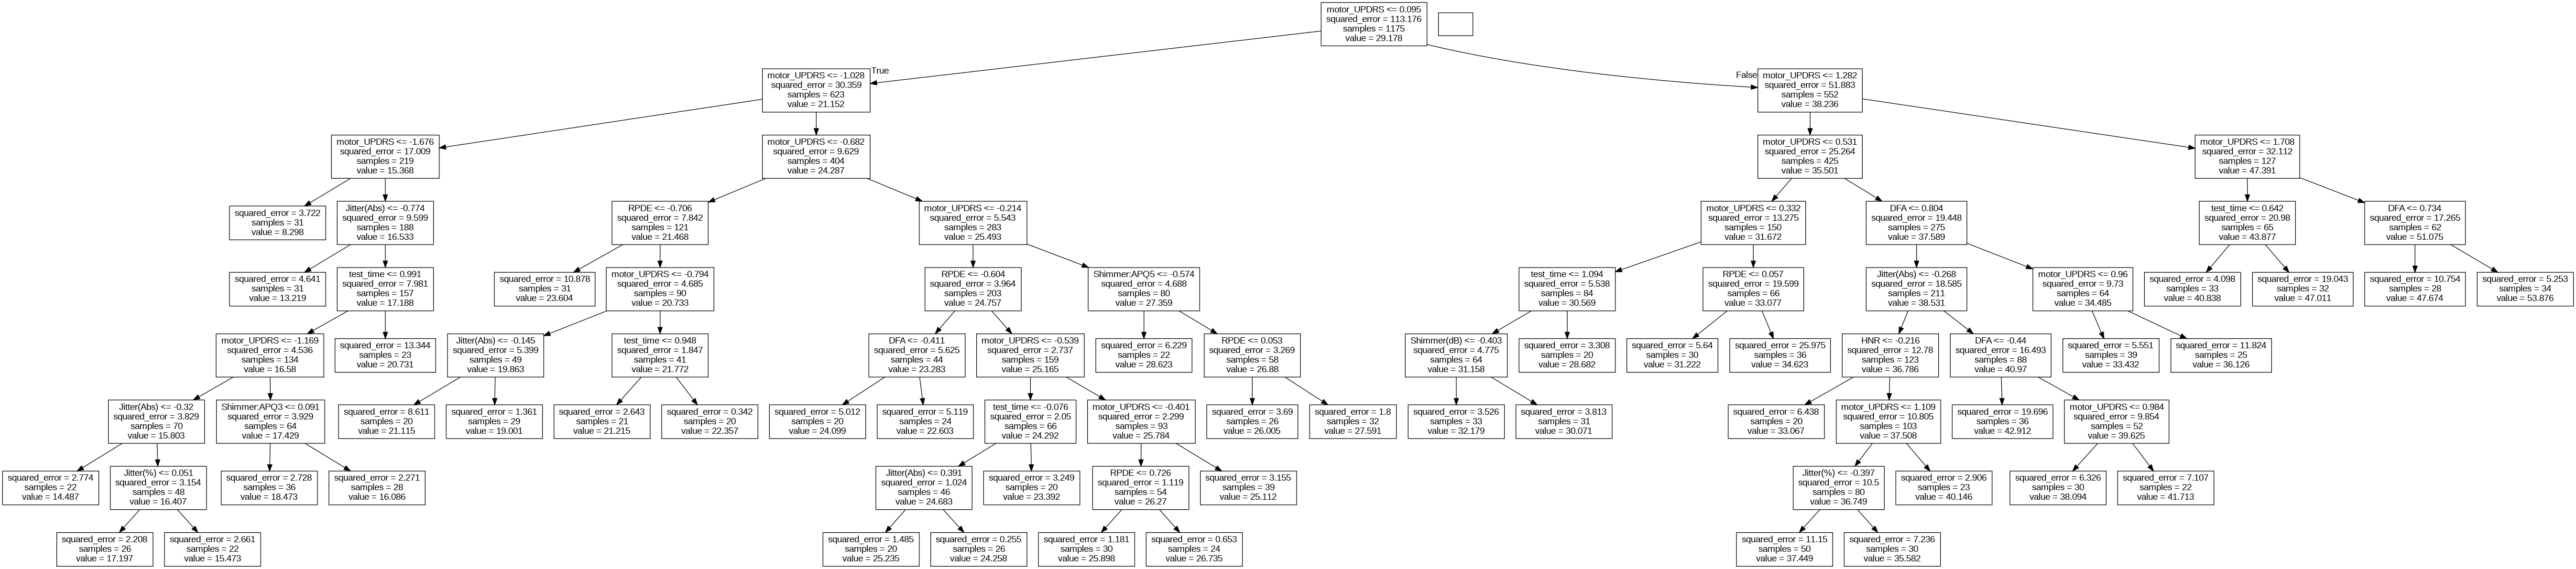

In [ ]:
#Inspecting tree of CART
#Create DOT data. The first argument in tree.export_graphviz is the model name, out_file is used to write model into out_file, next parameters are information on indicator and predictive parameters

from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(Model_DTR,feature_names=My_data.columns,
                                class_names=['total_UPDRS '] )

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [ ]:
#Discovering important features from CART
#Printing score of importance to features using feature_importances_ function of the model
CART_featureImportance= pd.DataFrame({'Feature_name':My_data.columns, 'Importance Score':Model_DTR.feature_importances_ })
print(CART_featureImportance)

     Feature_name  Importance Score
0       test_time          0.008664
1     motor_UPDRS          0.957385
2       Jitter(%)          0.000803
3     Jitter(Abs)          0.011356
4      Jitter:RAP          0.000000
5     Jitter:PPQ5          0.000000
6      Jitter:DDP          0.000000
7         Shimmer          0.000000
8     Shimmer(dB)          0.000566
9    Shimmer:APQ3          0.000715
10   Shimmer:APQ5          0.000386
11  Shimmer:APQ11          0.000000
12    Shimmer:DDA          0.000000
13            NHR          0.000000
14            HNR          0.002632
15           RPDE          0.004356
16            DFA          0.013138
17            PPE          0.000000
